In [69]:
import pandas as pd

In [70]:
alucar = pd.read_csv('alucar.csv')

In [71]:
alucar.sample(5)

,mes,vendas
22,2018-11-30,670
6,2017-07-31,101
7,2017-08-31,124
18,2018-07-31,483
2,2017-03-31,33


In [72]:
print(f"Quantidade de linhas e colunas: {alucar.shape}")

Quantidade de linhas e colunas: (24, 2)


In [73]:
print(f"Quantidade de dados nulos: {alucar.isna().sum().sum()}")

Quantidade de dados nulos: 0


In [74]:
alucar.mes = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [75]:
alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [76]:
import seaborn as sns

In [77]:
%matplotlib inline
from matplotlib import pyplot as plt

In [78]:
print(sns.__version__)

0.11.2


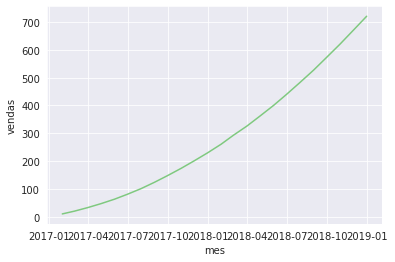

In [79]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

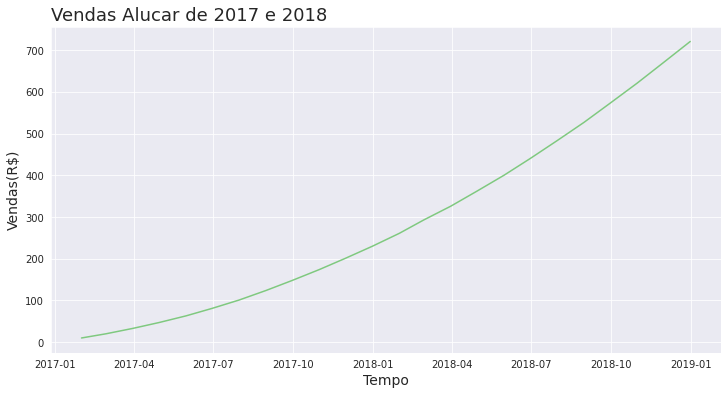

In [80]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax = ax.set_ylabel('Vendas(R$)', fontsize = 14)

In [81]:
alucar['aumento'] = alucar.vendas.diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


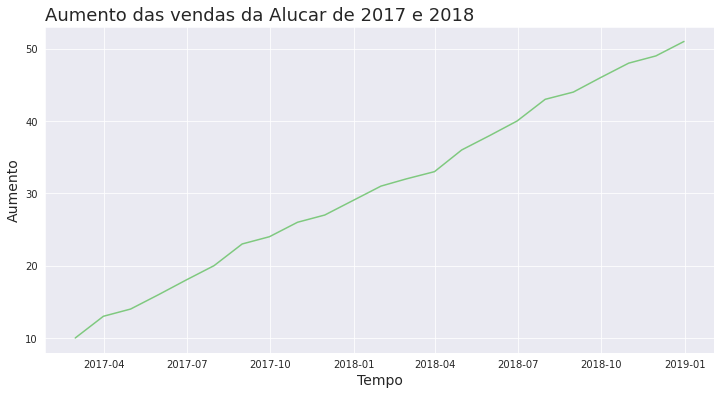

In [82]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax = ax.set_ylabel('Aumento', fontsize = 14)

In [83]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax = ax.set_ylabel(labely, fontsize = 14)
  ax

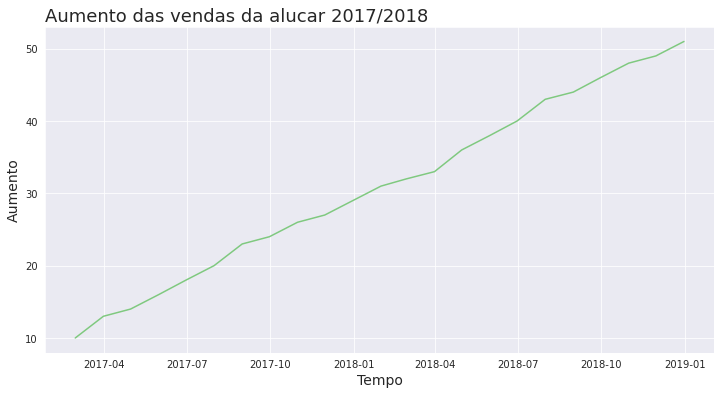

In [84]:
plotar('Aumento das vendas da alucar 2017/2018', 'Tempo', 'Aumento',
       'mes', 'aumento', alucar)

In [85]:
alucar['aceleracao'] = alucar.aumento.diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


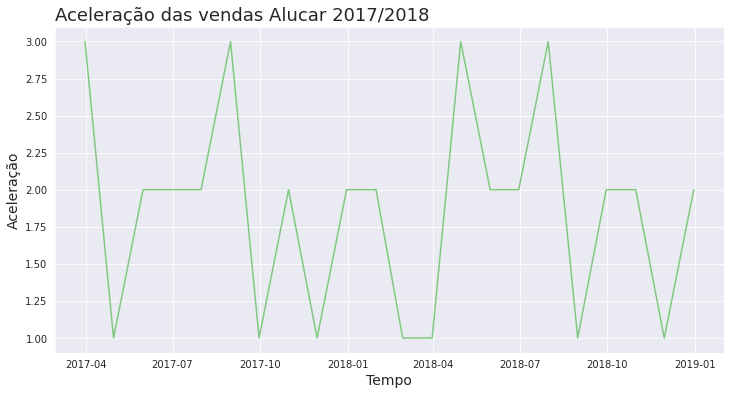

In [86]:
plotar('Aceleração das vendas Alucar 2017/2018', 'Tempo', 'Aceleração',
       'mes', 'aceleracao', alucar)

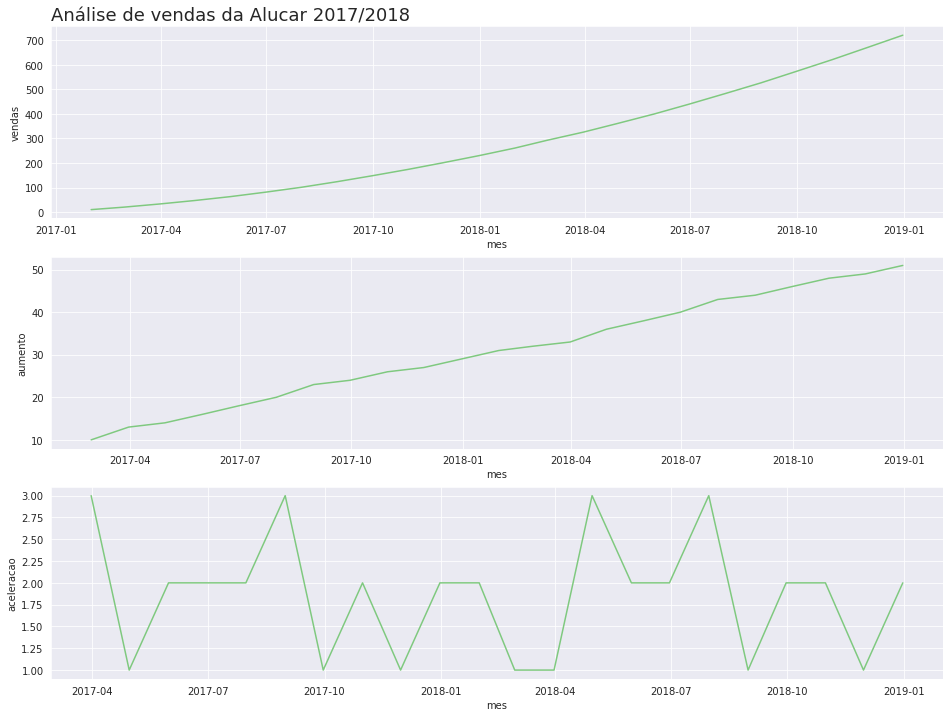

In [87]:
plt.figure(figsize = (16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas da Alucar 2017/2018', fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
ax = ax

In [88]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize = (16,12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x = x, y = y3, data = dataset)
  ax = ax

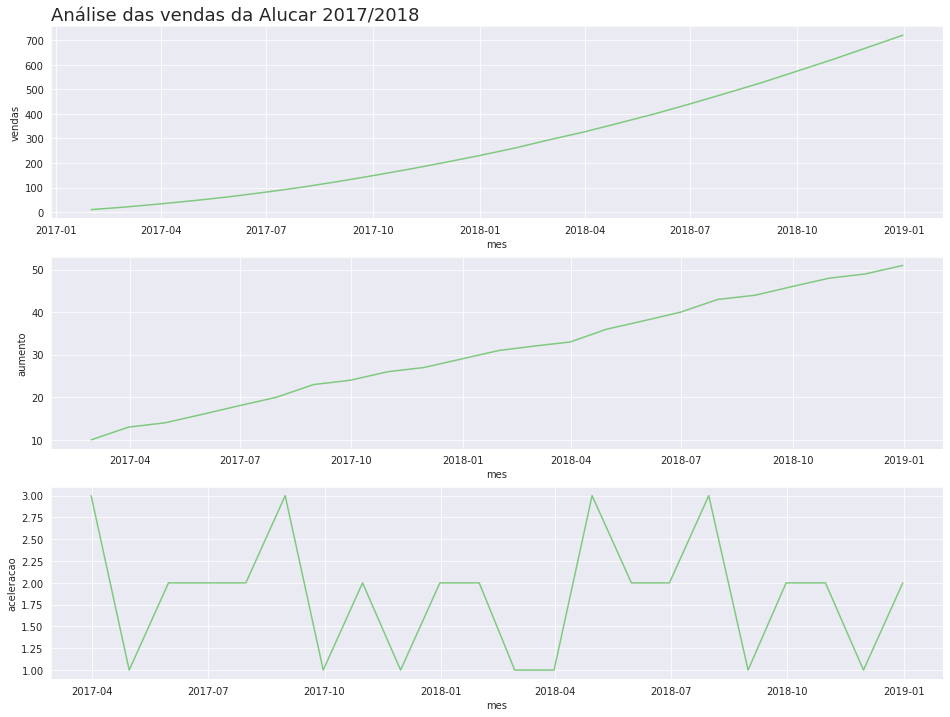

In [89]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', 
                alucar, 'Análise das vendas da Alucar 2017/2018')

In [90]:
from pandas.plotting import autocorrelation_plot

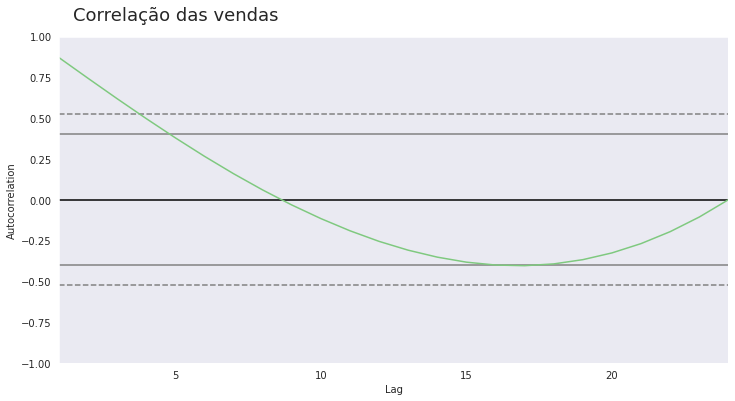

In [91]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar.vendas)
ax = ax

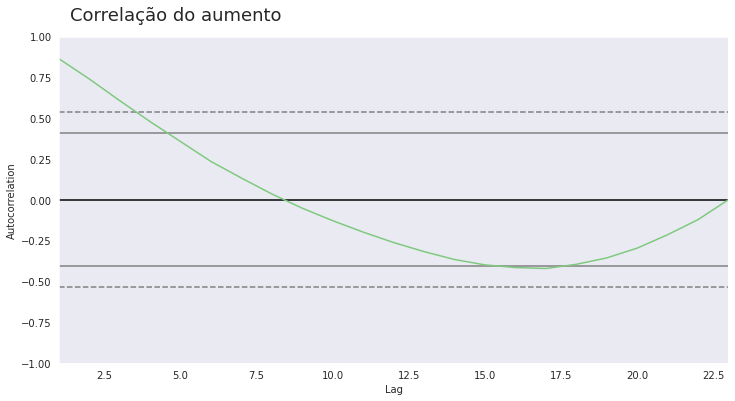

In [92]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar.aumento[1:])
ax = ax

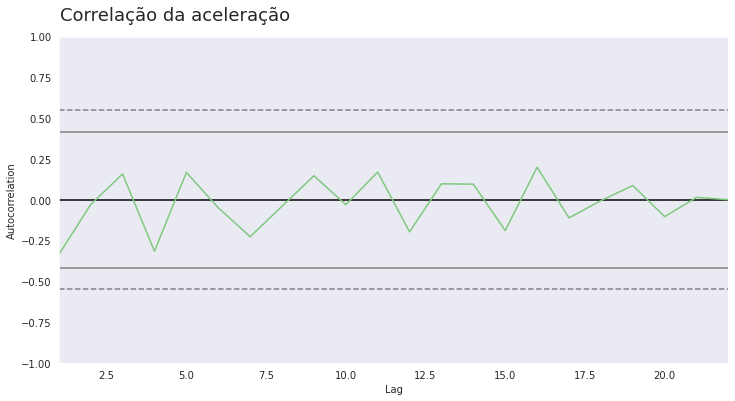

In [93]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação da aceleração', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar.aceleracao[2:])
ax = ax

#Analisando Newsletter

In [94]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.sample(5)

,mes,assinantes
5,2017-06-30,66
7,2017-08-31,107
21,2018-10-31,444
16,2018-05-31,367
6,2017-07-31,85


In [95]:
print(f'Quantidade de linha e colunas: {assinantes.shape}')
print(f'Quantidade de dados nulos: {assinantes.isna().sum().sum()}')

Quantidade de linha e colunas: (24, 2)
Quantidade de dados nulos: 0


In [96]:
assinantes.mes = pd.to_datetime(assinantes.mes)
assinantes.sample(10)

,mes,assinantes
2,2017-03-31,21
1,2017-02-28,10
6,2017-07-31,85
8,2017-09-30,132
14,2018-03-31,313
15,2018-04-30,341
13,2018-02-28,283
12,2018-01-31,252
7,2017-08-31,107
5,2017-06-30,66


In [97]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.sample(10)

,mes,assinantes,aumento,aceleracao
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
15,2018-04-30,341,28.0,-2.0
22,2018-11-30,449,5.0,-2.0
12,2018-01-31,252,31.0,0.0
14,2018-03-31,313,30.0,-1.0
18,2018-07-31,410,20.0,-3.0
0,2017-01-31,0,NaN,NaN
21,2018-10-31,444,7.0,-4.0
5,2017-06-30,66,17.0,2.0


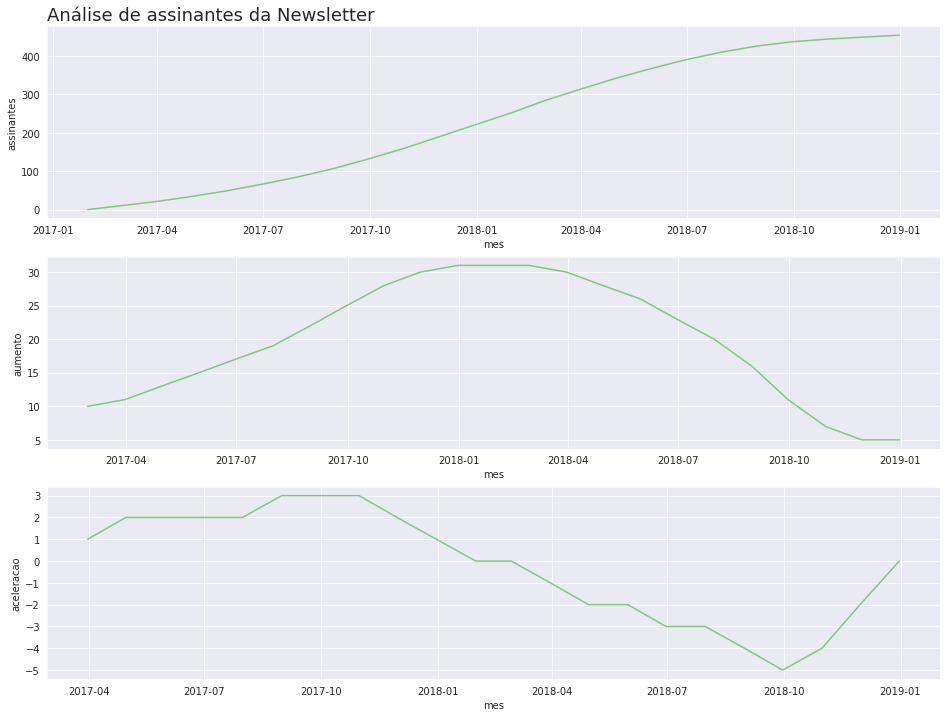

In [98]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao',
                assinantes, 'Análise de assinantes da Newsletter')

#Análise Vendas Chocolura

In [99]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.sample(10)

,mes,vendas
21,2018-10,218
3,2017-04,280
17,2018-06,311
11,2017-12,205
10,2017-11,215
2,2017-03,209
12,2018-01,208
20,2018-09,207
7,2017-08,205
22,2018-11,211


In [100]:
chocolura.mes = pd.to_datetime(chocolura.mes)
chocolura.sample(5)

,mes,vendas
9,2017-10-01,210
0,2017-01-01,210
17,2018-06-01,311
16,2018-05-01,215
19,2018-08-01,210


In [101]:
print(f"Quantidade de linhas {chocolura.shape}")

Quantidade de linhas (24, 2)


In [102]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.sample(10)

,mes,vendas,aumento,aceleracao
20,2018-09-01,207,-3.0,-5.0
4,2017-05-01,211,-69.0,-140.0
6,2017-07-01,210,-90.0,-179.0
2,2017-03-01,209,24.0,49.0
8,2017-09-01,208,3.0,8.0
5,2017-06-01,300,89.0,158.0
12,2018-01-01,208,3.0,13.0
15,2018-04-01,279,76.0,63.0
10,2017-11-01,215,5.0,3.0
9,2017-10-01,210,2.0,-1.0


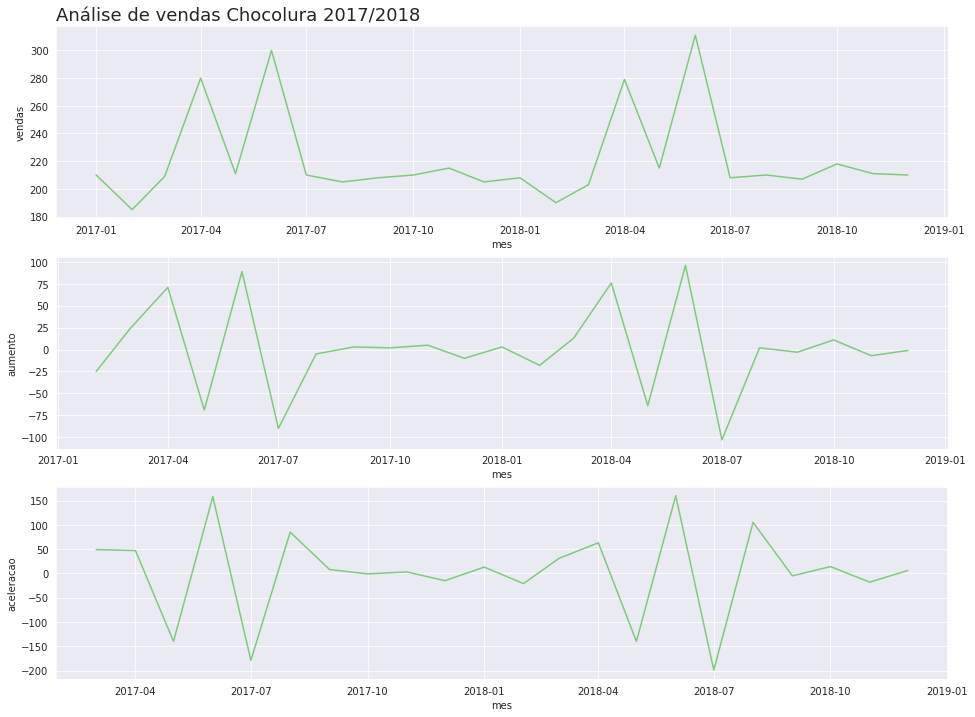

In [103]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                chocolura, 'Análise de vendas Chocolura 2017/2018')

# Chocolura - Vendas diárias(Outubro/Novembro)

In [104]:
vendas_dia = pd.read_csv('vendas_por_dia.csv')
vendas_dia.sample(5)

,dia,vendas
35,2018-11-05,53
1,2018-10-02,48
60,2018-11-30,52
6,2018-10-07,20
53,2018-11-23,53


In [105]:
print(f"QUantidade de linhas e colunas: {vendas_dia.shape}")
print(f"Quatnidade de dados nulos: {vendas_dia.isna().sum().sum()}")

QUantidade de linhas e colunas: (61, 2)
Quatnidade de dados nulos: 0


In [106]:
vendas_dia.dia = pd.to_datetime(vendas_dia.dia)
vendas_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [107]:
vendas_dia['aumento'] = vendas_dia.vendas.diff()
vendas_dia['aceleracao'] = vendas_dia['aumento'].diff()
vendas_dia.sample(5)

,dia,vendas,aumento,aceleracao
49,2018-11-19,55,37.0,35.0
30,2018-10-31,51,2.0,8.0
56,2018-11-26,54,34.0,31.0
46,2018-11-16,58,1.0,-4.0
22,2018-10-23,55,3.0,-30.0


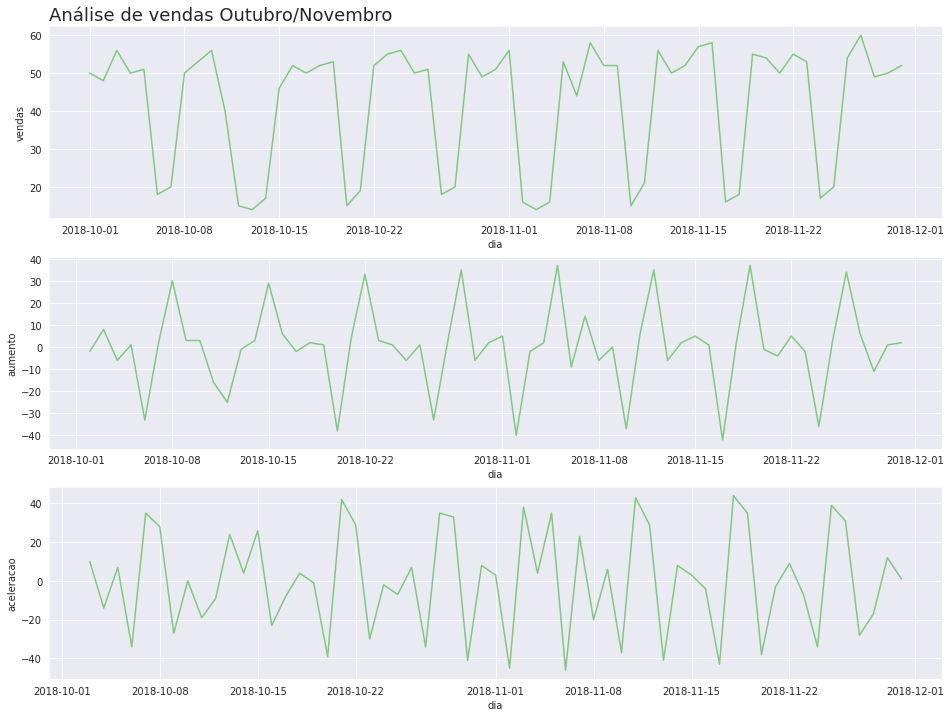

In [108]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                vendas_dia, 'Análise de vendas Outubro/Novembro ')

#Analisando a sazonalidade

In [109]:
vendas_dia['dia_semana'] = vendas_dia['dia'].dt.day_name()
vendas_dia.sample(10)

,dia,vendas,aumento,aceleracao,dia_semana
6,2018-10-07,20,2.0,35.0,Sunday
15,2018-10-16,52,6.0,-23.0,Tuesday
8,2018-10-09,53,3.0,-27.0,Tuesday
13,2018-10-14,17,3.0,4.0,Sunday
50,2018-11-20,54,-1.0,-38.0,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
16,2018-10-17,50,-2.0,-8.0,Wednesday
33,2018-11-03,14,-2.0,38.0,Saturday
17,2018-10-18,52,2.0,4.0,Thursday
43,2018-11-13,50,-6.0,-41.0,Tuesday


In [110]:
vendas_dia.dia_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [111]:
dias_traduzidos = {'Monday' : 'Segunda', 'Tuesday' : 'Terca', 'Wednesday' : 'Quarta',
                   'Thursday' : 'Quinta', 'Friday' : 'Sexta',
                   'Saturday' : 'Sabado', 'Sunday' : 'Domingo'}

In [112]:
vendas_dia.dia_semana = vendas_dia.dia_semana.map(dias_traduzidos)
vendas_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


#Agrupando os dias

In [119]:
vendas_agrupadas = vendas_dia.groupby('dia_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


#Correlação das vendas diárias

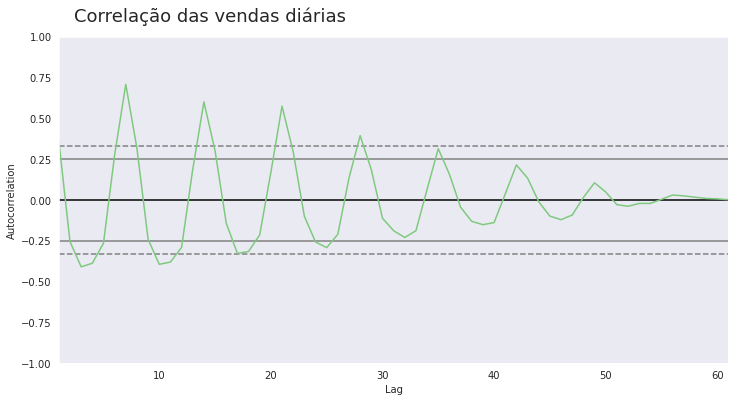

In [121]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_dia['vendas'])
ax = ax

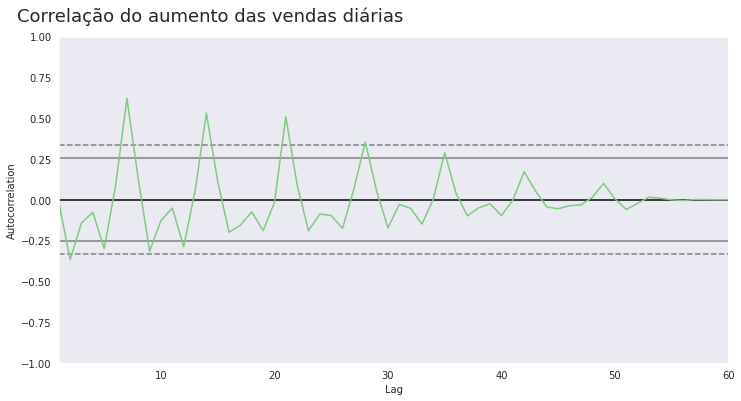

In [122]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_dia['aumento'][1:])
ax = ax

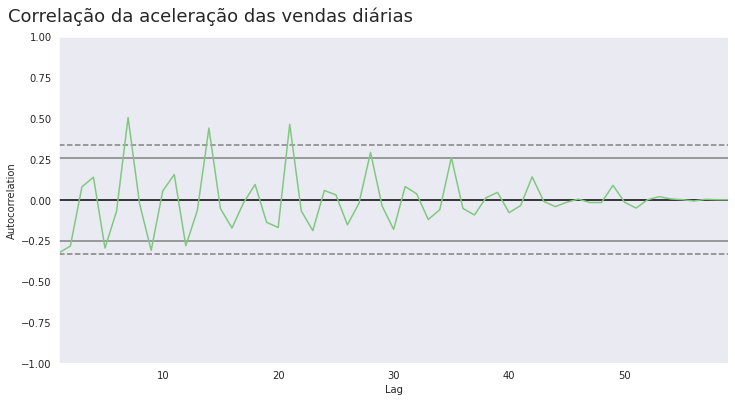

In [123]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_dia['aceleracao'][2:])
ax = ax

#Análise - Cafelura

In [125]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.sample(10)

,mes,vendas
23,2018-12-31,57728
14,2018-03-31,29304
8,2017-09-30,11792
15,2018-04-30,28960
21,2018-10-31,55944
2,2017-03-31,3240
4,2017-05-31,5670
17,2018-06-30,35280
19,2018-08-31,52710
6,2017-07-31,8096


In [126]:
cafelura.mes = pd.to_datetime(cafelura.mes)
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [127]:
print(f"Quantidade de linhas e colunas: {cafelura.shape}")

Quantidade de linhas e colunas: (24, 2)


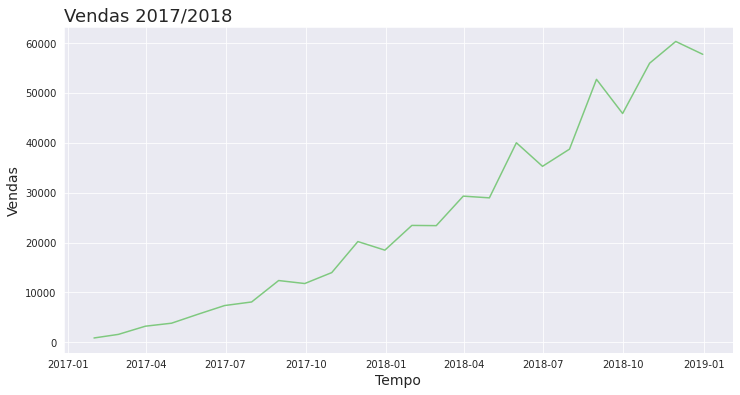

In [128]:
plotar('Vendas 2017/2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [129]:
quantidade_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_fds.sample(5)

,quantidade_de_dias
4,9
12,9
7,10
18,8
13,8


In [130]:
quantidade_fds.quantidade_de_dias.values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [135]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_fds['quantidade_de_dias'].values
cafelura.head(10)

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0
5,2017-06-30,7380,820.0
6,2017-07-31,8096,1012.0
7,2017-08-31,12390,1239.0
8,2017-09-30,11792,1474.0
9,2017-10-31,13984,1748.0


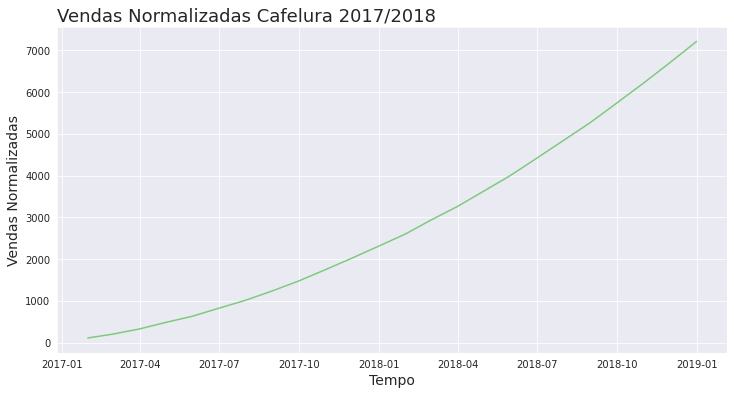

In [137]:
plotar('Vendas Normalizadas Cafelura 2017/2018', 'Tempo', 'Vendas Normalizadas',
       'mes', 'vendas_normalizadas', cafelura)

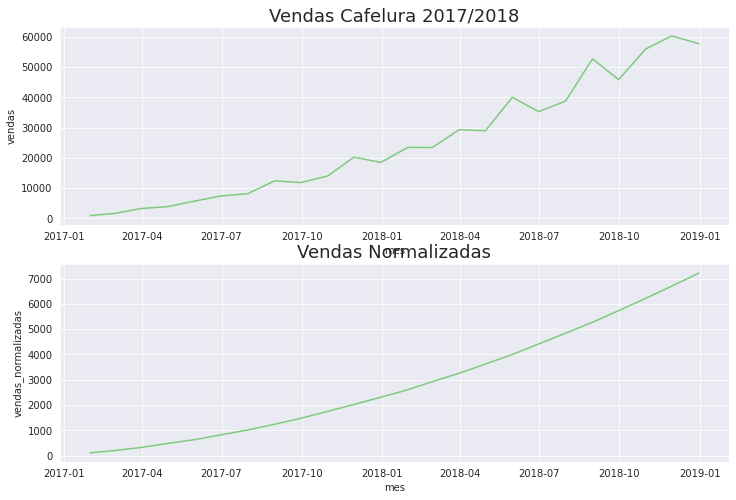

In [139]:
plt.figure(figsize = (12, 8))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017/2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data = cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data = cafelura)
ax = ax

# Statsmodels

In [140]:
from statsmodels.tsa.seasonal import seasonal_decompose

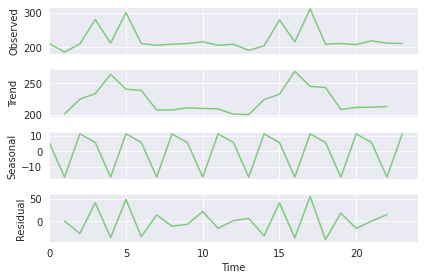

In [143]:
resultado = seasonal_decompose([chocolura['vendas']], freq = 3)
ax = resultado.plot()

In [144]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [145]:
data = ({
    'observacao' : observacao,
    'tendencia' : tendencia,
    'sazonalidade' : sazonalidade,
    'ruido' : ruido
})
resultado = pd.DataFrame(data)
resultado.head(10)

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508
5,300,240.333333,11.126984,48.539683
6,210,238.333333,5.603175,-33.936508
7,205,207.666667,-16.730159,14.063492
8,208,207.666667,11.126984,-10.793651
9,210,211.000000,5.603175,-6.603175


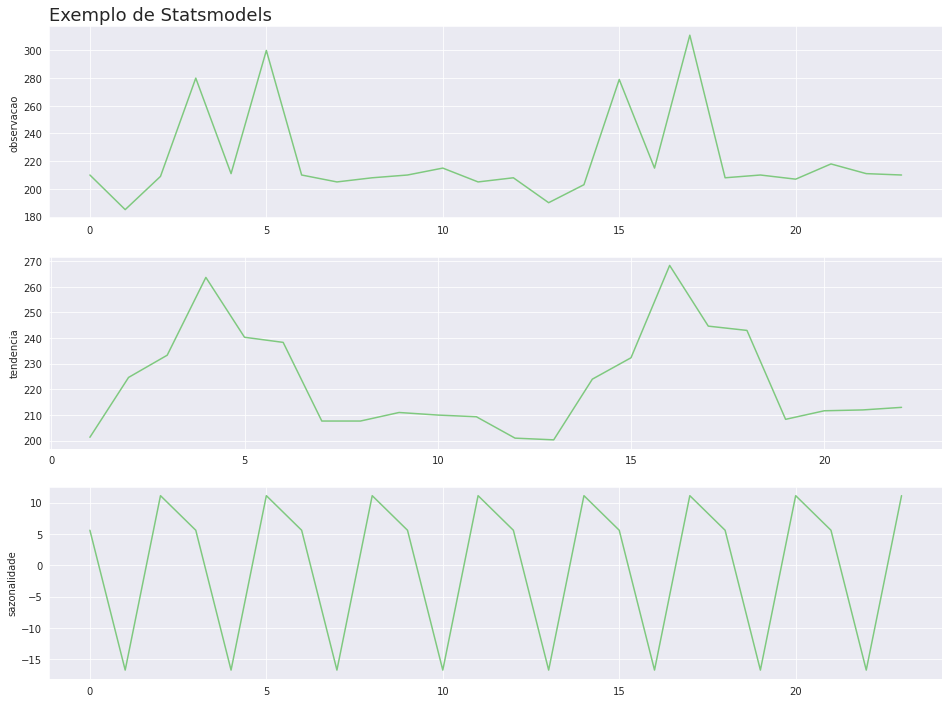

In [146]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade',
                resultado, 'Exemplo de Statsmodels')

# Análise Alucel

In [147]:
alucel = pd.read_csv('alucel.csv')
alucel.head(10)

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17
5,2018-10-06,2005.89
6,2018-10-07,3793.07
7,2018-10-08,2039.59
8,2018-10-09,3365.58
9,2018-10-10,2616.12


In [148]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [149]:
alucel.dia = pd.to_datetime(alucel.dia)
alucel.head(5)

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [150]:
print(f"Quantidade de linhas e colunas: {alucel.shape}")
print(f"Quantidade de dados nulas: {alucel.isna().sum().sum()}")

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulas: 0


In [152]:
alucel['aumento'] = alucel.vendas.diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.sample(10)

,dia,vendas,aumento,aceleracao
39,2018-11-09,5568.57,1441.50,4634.11
2,2018-10-03,1860.36,-325.33,-1136.19
22,2018-10-23,5950.35,408.45,563.48
13,2018-10-14,2183.18,-1891.95,-4388.71
20,2018-10-21,5696.93,2618.15,3327.11
58,2018-11-28,9216.26,-13768.30,-25979.33
47,2018-11-17,7483.16,391.91,4158.48
19,2018-10-20,3078.78,-708.96,666.99
8,2018-10-09,3365.58,1325.99,3079.47
40,2018-11-10,4589.71,-978.86,-2420.36


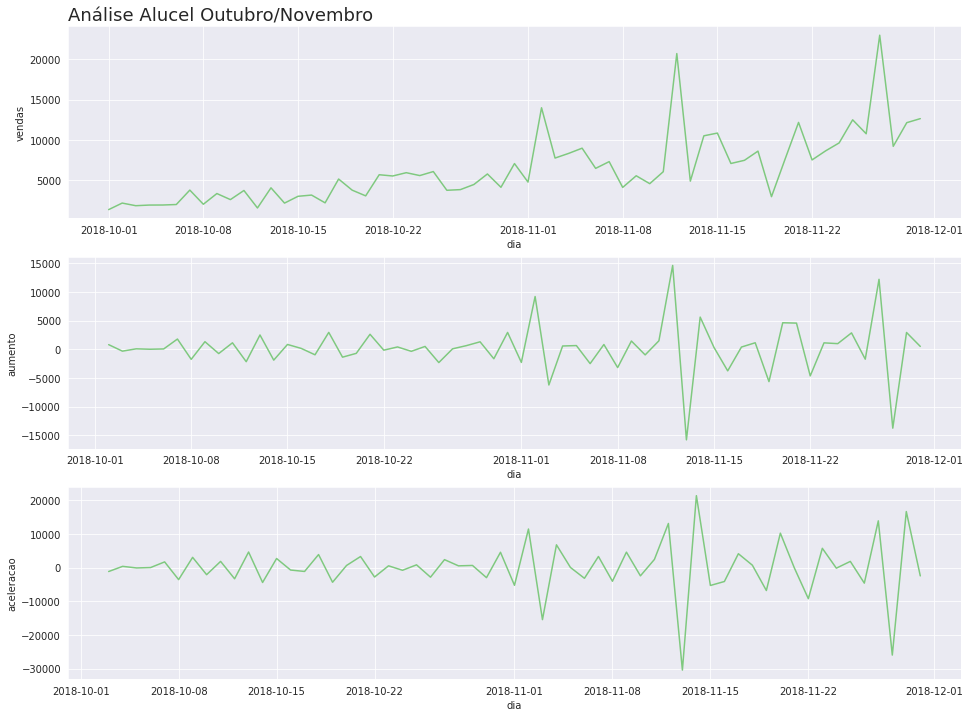

In [153]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                alucel, 'Análise Alucel Outubro/Novembro')

#Média Móvel

In [158]:
alucel['media_movel'] = alucel.vendas.rolling(7).mean()

In [160]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


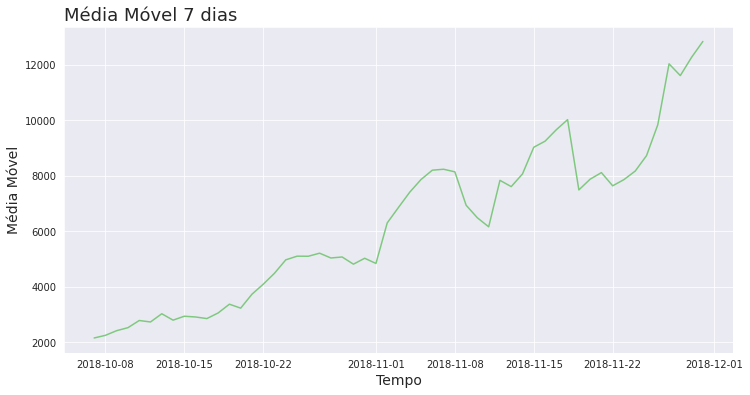

In [161]:
plotar('Média Móvel 7 dias', 'Tempo', 'Média Móvel', 'dia',
       'media_movel', alucel)

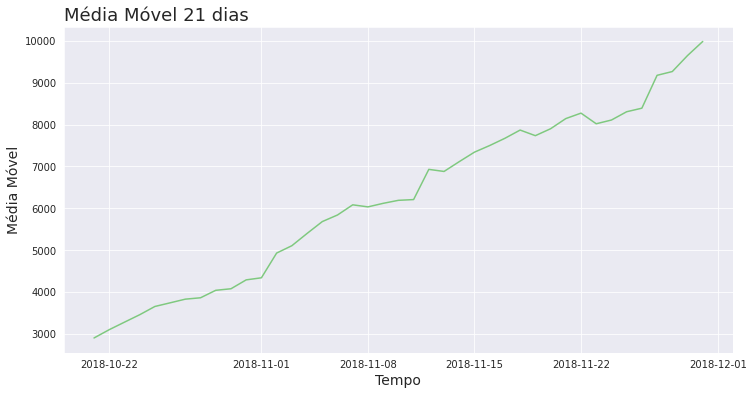

In [162]:
alucel['media_movel_21'] = alucel.vendas.rolling(21).mean()
plotar('Média Móvel 21 dias', 'Tempo', 'Média Móvel', 'dia',
       'media_movel_21', alucel)

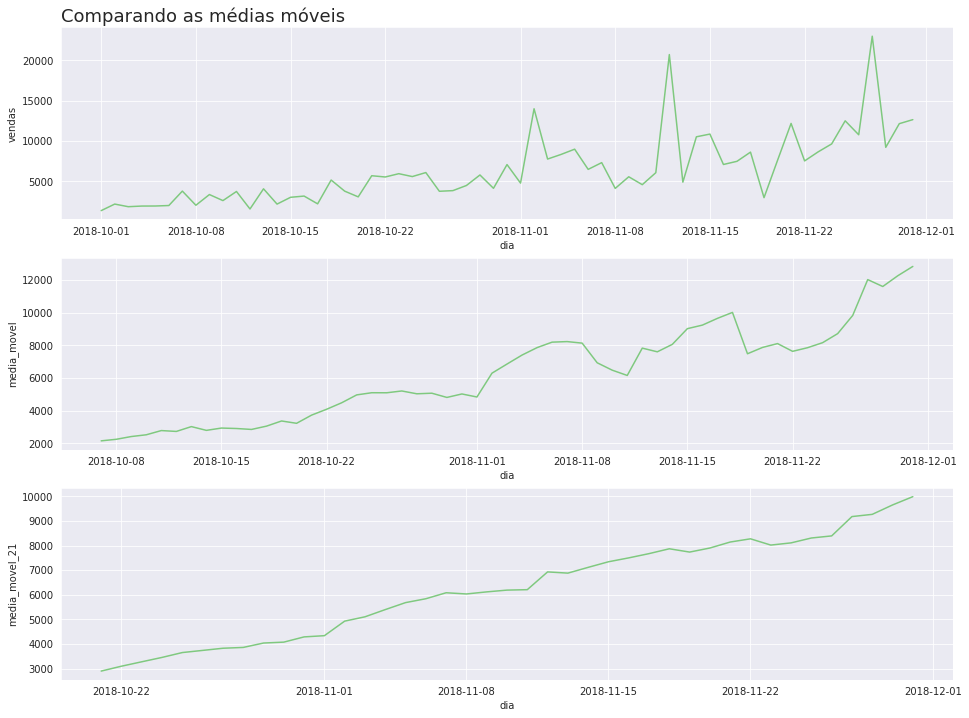

In [163]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21',
                alucel, 'Comparando as médias móveis')